In [4]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('test_data.csv')

# Calculate the time difference between consecutive timestamps
df['inter_arrival_time'] = df['timestamp'].diff()

# Calculate the average and standard deviation of inter-arrival times
avg_inter_arrival_time = df['inter_arrival_time'].mean()
std_inter_arrival_time = df['inter_arrival_time'].std()

print("Average Inter-Arrival Time:", avg_inter_arrival_time, "seconds")
print("Standard Deviation of Inter-Arrival Time:", std_inter_arrival_time, "seconds")


Average Inter-Arrival Time: 1.8087512659250775 seconds
Standard Deviation of Inter-Arrival Time: 229.90887613603198 seconds


In [24]:



# Create a pivot table to count the occurrences of user_id and subarea pairs
pivot_df = df.pivot_table(index='user_id', columns='subarea', aggfunc='size', fill_value=0)

# Reset index to move user_id from index to a regular column
pivot_df.reset_index(inplace=True)

# Rename columns for clarity
pivot_df.columns = ['user_id', 'subarea_1', 'subarea_2', 'subarea_3', 'subarea_4']

# Find the column label with the most requests for each user
pivot_df['most_common_subarea'] = pivot_df[['subarea_1', 'subarea_2', 'subarea_3', 'subarea_4']].idxmax(axis=1).str.replace('subarea_', '')

# Save the pivot DataFrame to a new CSV file
pivot_df.to_csv('pivot_table_with_most_common_subarea1.csv', index=False)
print(pivot_df)


    user_id  subarea_1  subarea_2  subarea_3  subarea_4 most_common_subarea
0         0         68         68        335          3                   3
1         1         58          1        135         60                   3
2         2         65          0         48         64                   1
3         3          1        107        259         64                   3
4         4         48         21        263         47                   3
..      ...        ...        ...        ...        ...                 ...
95       95         53         52         98         51                   3
96       96         18         42        324         61                   3
97       97         64        120          0         29                   2
98       98          0         53        267         83                   3
99       99          3          1        111        118                   4

[100 rows x 6 columns]


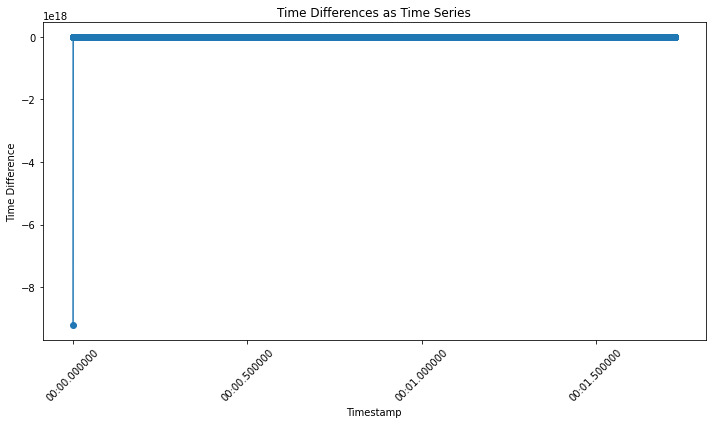

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('edge-nodes-9-period-5-min-req-5.csv')

# Convert the timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Calculate the time differences between consecutive timestamps
time_diff = df['timestamp'].diff()

# Plot the time differences as a time series
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], time_diff, marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Time Difference')
plt.title('Time Differences as Time Series')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:
column_avgs = pivot_df[['subarea_1', 'subarea_2', 'subarea_3', 'subarea_4']].mean()

print("Average of each subarea column:")
print(column_avgs)

Average of each subarea column:
subarea_1     54.69
subarea_2     42.21
subarea_3    119.79
subarea_4     50.59
dtype: float64
